<a href="https://colab.research.google.com/github/roboticjump404/YBI-FOUNDATION-INTERNSHIP/blob/main/internship_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SALES PREDICTION

OBJECTIVE:
TO PREDICT THE SALES BASED ON SALES DATASET USING LINEAR REGRESSION

DATA SOURCE: "https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv"


In [ ]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Import the sales data from the provided URL
sales = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv")

In [ ]:
#describe data
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
sales.describe

<bound method NDFrame.describe of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDT36         12.3          Low Fat         0.111448   
1               FDT36         12.3          Low Fat         0.111904   
2               FDT36         12.3               LF         0.111728   
3               FDT36         12.3          Low Fat         0.000000   
4               FDP12          9.8          Regular         0.045523   
...               ...          ...              ...              ...   
14199           FDG47         12.8          Low Fat         0.069606   
14200           FDG47         12.8          Low Fat         0.070013   
14201           FDG47         12.8          Low Fat         0.069561   
14202           FDG47          NaN          Low Fat         0.069282   
14203           FDG47         12.8          Low Fat         0.069727   

           Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0       Baking Goods  

In [ ]:
sales=sales.dropna()

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11815 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            11815 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           11815 non-null  object 
 3   Item_Visibility            11815 non-null  float64
 4   Item_Type                  11815 non-null  object 
 5   Item_MRP                   11815 non-null  float64
 6   Outlet_Identifier          11815 non-null  object 
 7   Outlet_Establishment_Year  11815 non-null  int64  
 8   Outlet_Size                11815 non-null  object 
 9   Outlet_Location_Type       11815 non-null  object 
 10  Outlet_Type                11815 non-null  object 
 11  Item_Outlet_Sales          11815 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


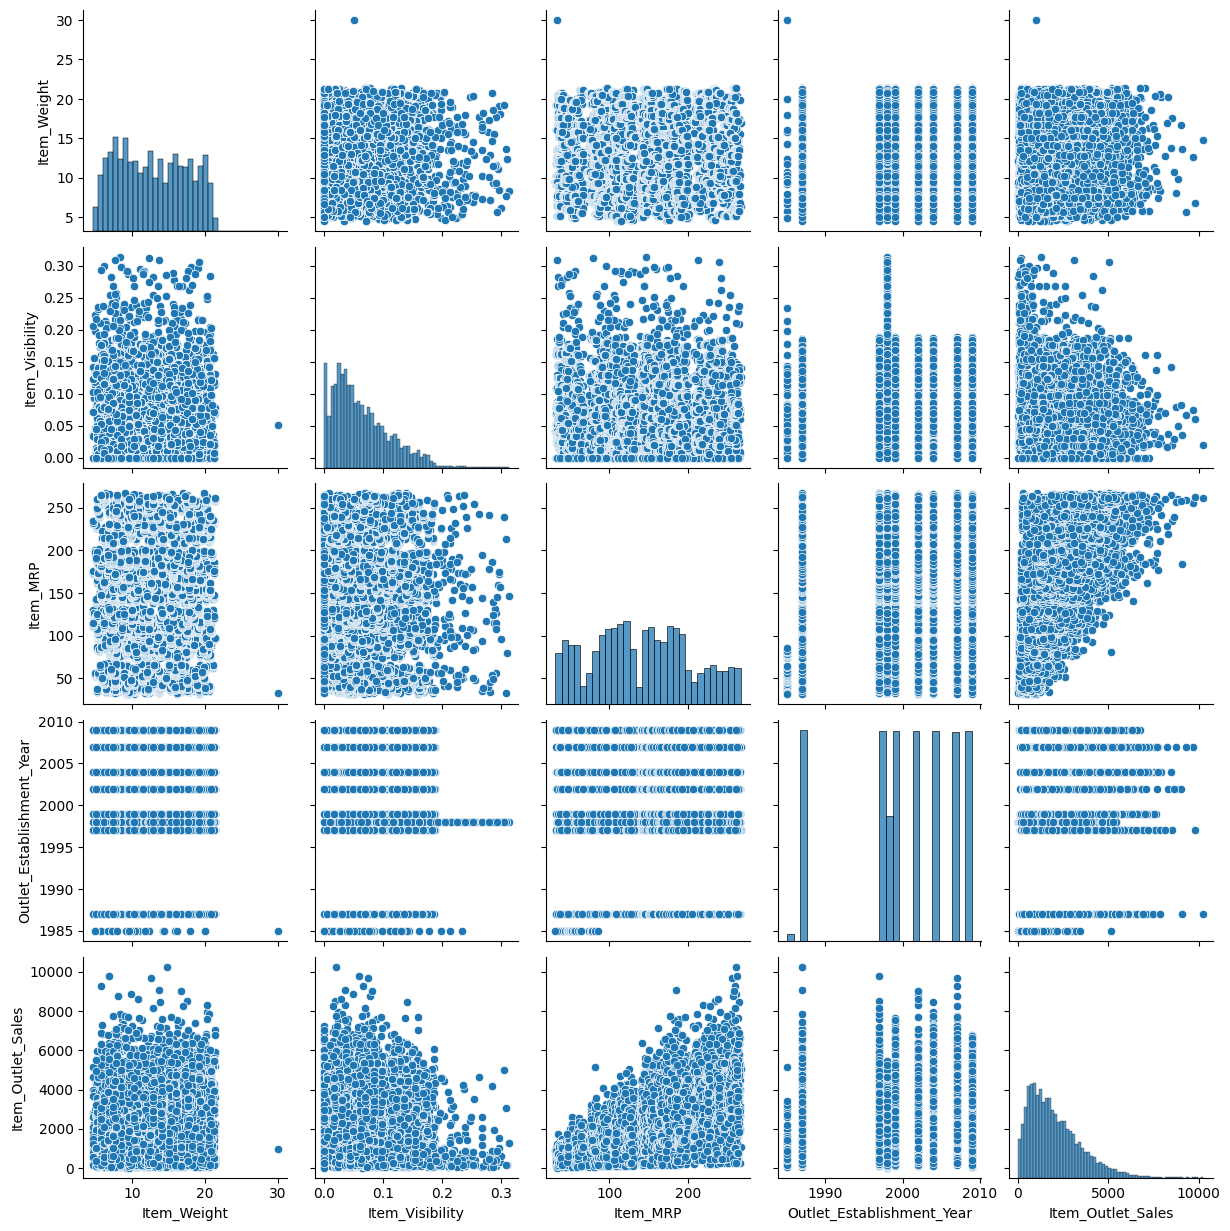

In [ ]:
#Data Visualisation
sns.pairplot(sales)
plt.show()


In [ ]:
#data preprocessing
sales=sales.dropna()


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11815 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            11815 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           11815 non-null  object 
 3   Item_Visibility            11815 non-null  float64
 4   Item_Type                  11815 non-null  object 
 5   Item_MRP                   11815 non-null  float64
 6   Outlet_Identifier          11815 non-null  object 
 7   Outlet_Establishment_Year  11815 non-null  int64  
 8   Outlet_Size                11815 non-null  object 
 9   Outlet_Location_Type       11815 non-null  object 
 10  Outlet_Type                11815 non-null  object 
 11  Item_Outlet_Sales          11815 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [ ]:
sales.describe

<bound method NDFrame.describe of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDT36         12.3          Low Fat         0.111448   
1               FDT36         12.3          Low Fat         0.111904   
2               FDT36         12.3               LF         0.111728   
3               FDT36         12.3          Low Fat         0.000000   
4               FDP12          9.8          Regular         0.045523   
...               ...          ...              ...              ...   
14198           FDG47         12.8          Low Fat         0.116528   
14199           FDG47         12.8          Low Fat         0.069606   
14200           FDG47         12.8          Low Fat         0.070013   
14201           FDG47         12.8          Low Fat         0.069561   
14203           FDG47         12.8          Low Fat         0.069727   

           Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0       Baking Goods  

In [ ]:
#Define Target Variable (y) and Feature Variables (X)
y = sales['Item_Outlet_Sales']
X = sales[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [ ]:
# Handle categorical features using one-hot encoding for 'Item_Fat_Content'
encoder = OneHotEncoder(drop='first', sparse=False)
ct = ColumnTransformer([('encoder', encoder, ['Item_Fat_Content'])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.8, random_state=2)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)


In [127]:
model.coef_

array([  7.89009942,  34.46135831,  16.49493899,  -3.01574943,
       295.09221196, -67.77677988, 901.23901294,   7.84574164])

In [128]:
model.intercept_

2038.33240949043

In [129]:
# Prediction
y_pred = model.predict(x_test_scaled)

In [131]:
#Model Evaluation
from sklearn.metrics import r2_score,mean_absolute_percentage_error
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print(mean_absolute_percentage_error(y_test,y_pred))


R-squared: 0.4833447438003097
0.741703712876527


EXPLANATION

In [130]:
#Importing Required Libraries: Import necessary libraries.
#Loading the Dataset: Load the sales data from the provided URL into a pandas DataFrame named 'sales.'
#Describing the Data: Use sales.head() to show the first few rows and sales.describe() for summary statistics.
#Visualise data to gain a better understanding
#Data preprocessing by removing the missing values
#Separate 'Item_Outlet_Sales' as 'y' and feature variables as 'X.'
#Split the data into training and testing sets using train_test_split.
#Initializing the Regression Model: Initialize a Linear Regression model using LinearRegression().
#Fitting the Model: Fit the Linear Regression model to the training data
#Making Predictions: Use the trained model to predict 'Item_Outlet_Sales' for the test set and store the predictions.
#Model Evauluation: We evaluate the model used by checking the r2_score and mean_absolute_percentage_error